In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import tejapi
tejapi.ApiConfig.api_key = 'Your Key'
tejapi.ApiConfig.ignoretz = True


Bad key The font.family property has five values in file /Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc, line 211 ('The font.family property has five values:')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key The font.family property has five values in file /Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc, line 211 ('The font.family property has five values:')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


## Load data & Preprocessing

In [2]:
ticker = ['1476', '2330', '2882', '2603']
# 儒鴻, 台積電, 國泰金, 長榮

In [3]:
df = tejapi.get('TWN/EWPRCD', # 公司交易資料-已調整股價(收盤價)
                  coid = ticker,
                  mdate = {'gte':'20200101', 'lte':'20220225'},
                  opts = {'columns': ['coid', 'mdate', 'close_adj']},
                  chinese_column_name = True,
                  paginate = True)
df = df.set_index('日期')
df

,證券碼,收盤價-除權息
日期,,
2020-01-02,1476,383.0747
2020-01-03,1476,387.3469
2020-01-06,1476,388.2963
2020-01-07,1476,386.8722
2020-01-08,1476,383.0747
...,...,...
2022-02-21,2882,64.6000
2022-02-22,2882,63.7000
2022-02-23,2882,63.7000


In [4]:
data = {}

for i in ticker:
    p = df[df['證券碼'] == i]
    p = p['收盤價-除權息']
    data.setdefault(i, p) 

data = pd.concat(data, axis = 1)
data

,1476,2330,2882,2603
日期,,,,
2020-01-02,383.0747,323.9664,38.8368,12.4500
2020-01-03,387.3469,324.4443,39.0649,12.7441
2020-01-06,388.2963,317.2769,38.5629,12.7441
2020-01-07,386.8722,314.8877,38.5173,12.6461
2020-01-08,383.0747,314.8877,38.1522,12.3520
...,...,...,...,...
2022-02-21,587.0000,632.0000,64.6000,147.0000
2022-02-22,586.0000,627.0000,63.7000,142.5000
2022-02-23,585.0000,625.0000,63.7000,145.0000


In [5]:
ret = tejapi.get('TWN/EWPRCD2', # 公司交易資料-已調整股價(收盤價)
                  coid = ticker,
                  mdate = {'gte':'20200101', 'lte':'20220225'},
                  opts = {'columns': ['coid', 'mdate', 'roia']},
                  chinese_column_name = True,
                  paginate = True)
ret = ret.set_index('日期')
ret

,證券碼,日報酬率(%)
日期,,
2020-01-02,1476,0.1241
2020-01-03,1476,1.1152
2020-01-06,1476,0.2451
2020-01-07,1476,-0.3667
2020-01-08,1476,-0.9816
...,...,...
2022-02-21,2882,0.0000
2022-02-22,2882,-1.3932
2022-02-23,2882,0.0000


In [6]:
data2 = {}

for i in ticker:
    r = ret[ret['證券碼'] == i]
    r = r['日報酬率(%)']
    data2.setdefault(i, r) 

data2 = pd.concat(data2, axis = 1)
data2 = data2 * 0.01
data2

,1476,2330,2882,2603
日期,,,,
2020-01-02,0.001241,0.024169,0.000000,0.024194
2020-01-03,0.011152,0.001475,0.005875,0.023622
2020-01-06,0.002451,-0.022091,-0.012850,0.000000
2020-01-07,-0.003667,-0.007530,-0.001183,-0.007692
2020-01-08,-0.009816,0.000000,-0.009479,-0.023256
...,...,...,...,...
2022-02-21,-0.003396,-0.007849,0.000000,0.038869
2022-02-22,-0.001704,-0.007911,-0.013932,-0.030612
2022-02-23,-0.001706,-0.003190,0.000000,0.017544


In [7]:
value = data.iloc[-1] * 1000

In [8]:
Mean = []
STD = []
MAX = []
Min = []
abs_var = []
re_var = []

for i in ticker:
    v = data2[i].std()                            # Standard Error
    mean = data2[i].mean()                        # Mean 
    maximum = data2[i].max()                      # Maximum
    minimum = data2[i].min()                      # Minimum
    
    var_99_ab = (abs(-2.33)*v - mean) * value[i]   # Calculate 99% Absolute VaR
    var_99_re = (abs(-2.33)*v) * value[i]        # Calculate 99% Relative VaR
    
    # Append those values in lists
    Mean.append(mean)
    STD.append(v)
    MAX.append(maximum)
    Min.append(minimum)
    abs_var.append(var_99_ab)
    re_var.append(var_99_re)

In [9]:
dear = pd.DataFrame({'Mean': Mean, 'STD': STD, 'Maximum': MAX, 'Minimum': Min, '99%絕對VaR': abs_var,
                     '99%相對VaR': re_var}, index = ticker)
dear

,Mean,STD,Maximum,Minimum,99%絕對VaR,99%相對VaR
1476,0.001069,0.023505,0.099548,-0.099379,31090.157374,31709.281409
2330,0.001383,0.016974,0.099741,-0.055556,23052.188426,23887.697460
2882,0.001008,0.014264,0.099692,-0.075972,2007.690794,2070.488955
2603,0.005631,0.042374,0.100000,-0.100000,13360.074873,14168.056846


In [10]:
rho = data2.corr() # Apply ret to avoid Spurious Regression
rho

,1476,2330,2882,2603
1476,1.000000,0.334584,0.443590,0.265358
2330,0.334584,1.000000,0.417408,0.117416
2882,0.443590,0.417408,1.000000,0.341223
2603,0.265358,0.117416,0.341223,1.000000


In [11]:
dear = dear.drop(columns = ['Mean', 'STD', 'Maximum', 'Minimum'])
dear

,99%絕對VaR,99%相對VaR
1476,31090.157374,31709.281409
2330,23052.188426,23887.697460
2882,2007.690794,2070.488955
2603,13360.074873,14168.056846


In [12]:
portfolio = pd.concat([dear, rho,], axis = 1) # Concatenate var and rho
portfolio[['99%絕對VaR', '99%相對VaR']] = portfolio[['99%絕對VaR', '99%相對VaR']]
portfolio

,99%絕對VaR,99%相對VaR,1476,2330,2882,2603
1476,31090.157374,31709.281409,1.000000,0.334584,0.443590,0.265358
2330,23052.188426,23887.697460,0.334584,1.000000,0.417408,0.117416
2882,2007.690794,2070.488955,0.443590,0.417408,1.000000,0.341223
2603,13360.074873,14168.056846,0.265358,0.117416,0.341223,1.000000


In [13]:
part1 = sum(portfolio['99%絕對VaR']**2)
            
part2 = 2*portfolio.iat[0,3] * portfolio.iat[0,0] * portfolio.iat[1,0]\
+ 2*portfolio.iat[0,4] * portfolio.iat[0,0] * portfolio.iat[2,0]  \
+ 2*portfolio.iat[0,5] * portfolio.iat[0,0] * portfolio.iat[3,0]  \
+ 2*portfolio.iat[1,4] * portfolio.iat[1,0] * portfolio.iat[2,0]  \
+ 2*portfolio.iat[1,5] * portfolio.iat[1,0] * portfolio.iat[3,0]  \
+ 2*portfolio.iat[2,5] * portfolio.iat[2,0] * portfolio.iat[3,0]
    
print('99%絕對VaR', (part1 + part2)**(1/2))

99%絕對VaR 50647.782789196324


In [14]:
part1 = sum(portfolio['99%相對VaR']**2)
            
part2 = 2*portfolio.iat[0,3] * portfolio.iat[0,1] * portfolio.iat[1,1] \
+ 2*portfolio.iat[0,4] * portfolio.iat[0,1] * portfolio.iat[2,1] \
+ 2*portfolio.iat[0,5] * portfolio.iat[0,1] * portfolio.iat[3,1] \
+ 2*portfolio.iat[1,4] * portfolio.iat[1,1] * portfolio.iat[2,1] \
+ 2*portfolio.iat[1,5] * portfolio.iat[1,1] * portfolio.iat[3,1] \
+ 2*portfolio.iat[2,5] * portfolio.iat[2,1] * portfolio.iat[3,1]
    
print('99%相對VaR', (part1 + part2)**(1/2))

99%相對VaR 52205.85879387501


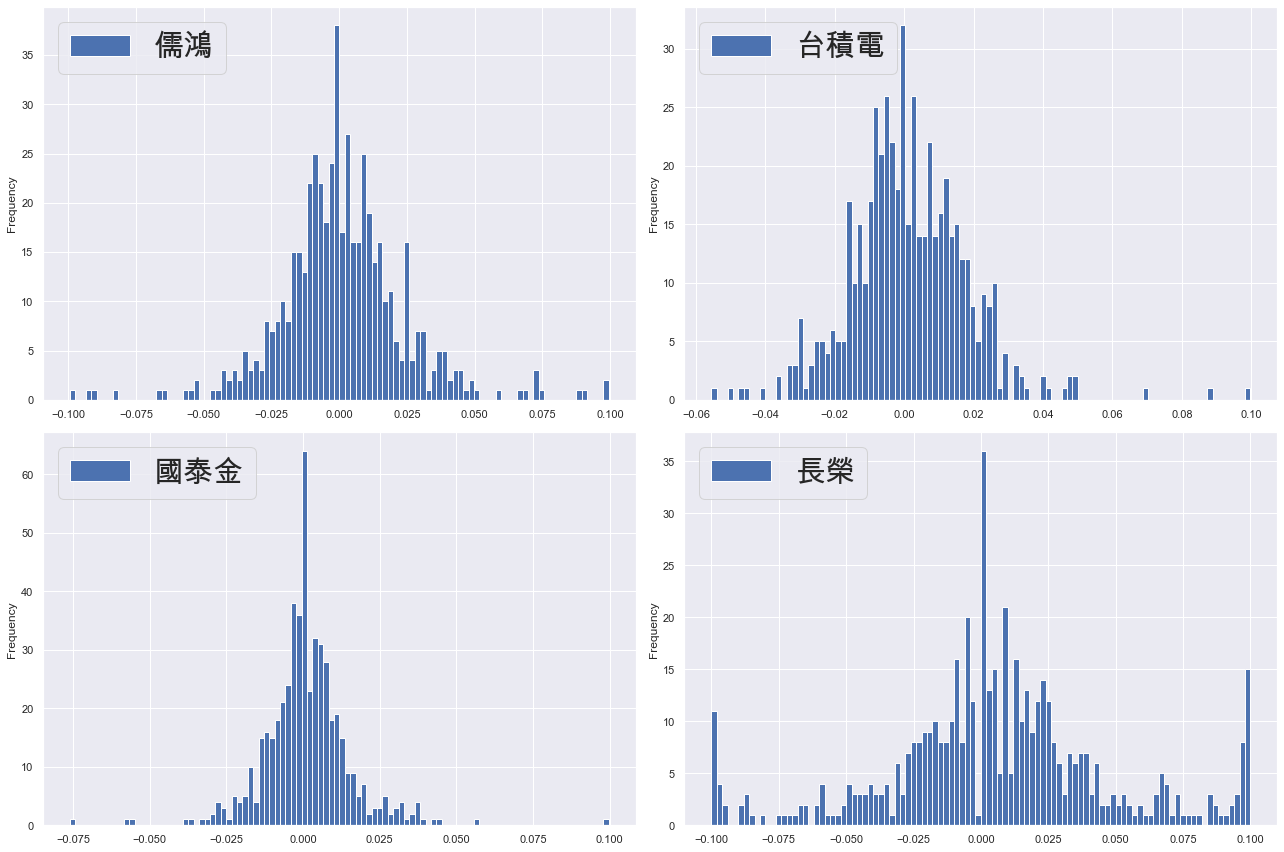

In [15]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

fig, ax =plt.subplots(figsize = (18, 12), nrows = 2, ncols = 2)

data2['1476'].plot.hist(ax=ax[0][0], bins = 100,range=(data2['1476'].min(), data2['1476'].max()),  label = '儒鴻')
ax[0][0].legend(loc = 2, fontsize = 30)

data2['2330'].plot.hist(ax=ax[0][1], bins = 100,range=(data2['2330'].min(), data2['2330'].max()),  label = '台積電')
ax[0][1].legend(loc = 2, fontsize = 30)

data2['2882'].plot.hist(ax=ax[1][0], bins = 100,range=(data2['2882'].min(), data2['2882'].max()),  label = '國泰金')
ax[1][0].legend(loc = 2, fontsize = 30)

data2['2603'].plot.hist(ax=ax[1][1], bins = 100,range=(data2['2603'].min(), data2['2603'].max()),  label = '長榮')
ax[1][1].legend(loc = 2, fontsize = 30)

plt.tight_layout()